In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import HTML, display

import seaborn as sns
sns.set(style='whitegrid')

## Prevalence of Depression by Gender Population across Countries for 1990 - 2017

In [2]:
depression = pd.read_csv('../Data/number-of-people-with-depression.csv')

In [3]:
depression_df = depression.copy()

In [4]:
len(depression_df)

6468

In [5]:
depression_df.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Male - Age: All Ages (Number),Prevalence - Depressive disorders - Sex: Female - Age: All Ages (Number)
0,Afghanistan,AFG,1990,138546.239872,179889.573799
1,Afghanistan,AFG,1991,142794.361829,186250.412127
2,Afghanistan,AFG,1992,165378.586277,217165.986617
3,Afghanistan,AFG,1993,190374.620067,250006.887326
4,Afghanistan,AFG,1994,197485.698675,259430.946814


In [6]:
# display(HTML(depression_df.to_html()))

In [7]:
depression_df.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Prevalence - Depressive disorders - Sex: Male - Age: All Ages (Number)': dtype('float64'),
 'Prevalence - Depressive disorders - Sex: Female - Age: All Ages (Number)': dtype('float64')}

### Data Cleaning
* Rename Columns
* Check and remove null entries.

In [8]:
depression_df.columns = ['Entity', 'Code', 'Year', 'Total Male Depression', 'Total Female Depression']

In [9]:
depression_df.columns

Index(['Entity', 'Code', 'Year', 'Total Male Depression',
       'Total Female Depression'],
      dtype='object')

In [10]:
depression_df.describe()

,Year,Total Male Depression,Total Female Depression
count,6468.000000,6.468000e+03,6.468000e+03
mean,2003.500000,1.700116e+06,2.707247e+06
std,8.078372,6.724542e+06,1.062258e+07
min,1990.000000,4.129049e+02,5.178167e+02
25%,1996.750000,2.967284e+04,4.429027e+04
50%,2003.500000,1.038870e+05,1.688615e+05
75%,2010.250000,5.065292e+05,8.137806e+05
max,2017.000000,1.028776e+08,1.615780e+08


In [11]:
depression_df.isnull().sum()

Entity                       0
Code                       980
Year                         0
Total Male Depression        0
Total Female Depression      0
dtype: int64

In [12]:
depression_df = depression_df[~depression_df.Code.isna()]
depression_df

,Entity,Code,Year,Total Male Depression,Total Female Depression
0,Afghanistan,AFG,1990,138546.239872,179889.573799
1,Afghanistan,AFG,1991,142794.361829,186250.412127
2,Afghanistan,AFG,1992,165378.586277,217165.986617
3,Afghanistan,AFG,1993,190374.620067,250006.887326
4,Afghanistan,AFG,1994,197485.698675,259430.946814
...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,124379.144594,179185.458996
6464,Zimbabwe,ZWE,2014,127444.530559,184221.238724
6465,Zimbabwe,ZWE,2015,130800.710215,189837.796943
6466,Zimbabwe,ZWE,2016,134247.530520,196189.823279


In [13]:
depression_df.isnull().sum()

Entity                     0
Code                       0
Year                       0
Total Male Depression      0
Total Female Depression    0
dtype: int64

In [14]:
depression_df['Overall Total Depression'] = depression_df['Total Male Depression'] + depression_df['Total Female Depression']
depression_df

,Entity,Code,Year,Total Male Depression,Total Female Depression,Overall Total Depression
0,Afghanistan,AFG,1990,138546.239872,179889.573799,318435.813671
1,Afghanistan,AFG,1991,142794.361829,186250.412127,329044.773956
2,Afghanistan,AFG,1992,165378.586277,217165.986617,382544.572894
3,Afghanistan,AFG,1993,190374.620067,250006.887326,440381.507393
4,Afghanistan,AFG,1994,197485.698675,259430.946814,456916.645489
...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,124379.144594,179185.458996,303564.603590
6464,Zimbabwe,ZWE,2014,127444.530559,184221.238724,311665.769283
6465,Zimbabwe,ZWE,2015,130800.710215,189837.796943,320638.507158
6466,Zimbabwe,ZWE,2016,134247.530520,196189.823279,330437.353799


In [15]:
depression_groups_by_countries = depression_df.groupby('Entity')
depression_groups_by_countries

In [16]:
depression_groups_by_year = depression_df.groupby('Year')
depression_groups_by_year

In [34]:
depression_groups_by_countries.get_group('Afghanistan')

,Code,Year,Total Male Depression,Total Female Depression,Overall Total Depression
0,AFG,1990,138546.239872,179889.573799,318435.813671
1,AFG,1991,142794.361829,186250.412127,329044.773956
2,AFG,1992,165378.586277,217165.986617,382544.572894
3,AFG,1993,190374.620067,250006.887326,440381.507393
4,AFG,1994,197485.698675,259430.946814,456916.645489
5,AFG,1995,204100.837770,267374.364193,471475.201963
6,AFG,1996,210799.732293,276116.487892,486916.220185
7,AFG,1997,216524.473085,283245.936415,499770.409500
8,AFG,1998,220854.079294,288841.368346,509695.447640
9,AFG,1999,217703.663771,285601.238228,503304.901999


In [36]:
cummulative_country_prevalence = depression_groups_by_countries.sum()
cummulative_country_prevalence

,Year,Total Male Depression,Total Female Depression,Overall Total Depression
Entity,,,,
Afghanistan,56098,7.523107e+06,9.794717e+06,1.731782e+07
Albania,56098,6.852884e+05,1.170746e+06,1.856035e+06
Algeria,56098,1.205626e+07,1.752527e+07,2.958152e+07
American Samoa,56098,1.590883e+04,2.160268e+04,3.751151e+04
Andorra,56098,3.171635e+04,5.068308e+04,8.239943e+04
...,...,...,...,...
Vietnam,56098,2.122887e+07,4.013423e+07,6.136310e+07
World,56098,2.339191e+09,3.702558e+09,6.041749e+09
Yemen,56098,7.184366e+06,1.028170e+07,1.746606e+07


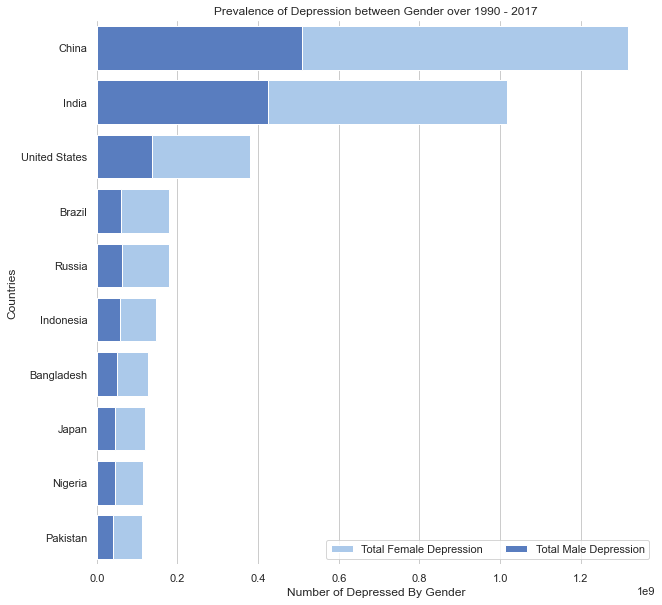

In [39]:
def plot_countries_prevalence(group):
    group = group[group.index != 'World'].sort_values("Overall Total Depression", ascending=False)[:10]

    f, ax = plt.subplots(figsize=(10, 10))
    labels = list(group.index)

    # Plot the total depressed population for each country
    sns.set_color_codes("pastel")
    sns.barplot(x="Overall Total Depression", y=labels, data=group,
                label="Total Female Depression", color="b")

    # Plot the number of male depression over the total depression
    # so that the remaining givens the number of female depression
    sns.set_color_codes("muted")
    sns.barplot(x="Total Male Depression", y=labels, data=group,
                label="Total Male Depression", color="b")

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="Countries", xlabel="Number of Depressed By Gender", title='Prevalence of Depression between Gender over 1990 - 2017')
    sns.despine(left=True, bottom=True)
    
plot_countries_prevalence(cummulative_country_prevalence)

In [40]:
country_group = [name for (name, group) in depression_groups_by_countries]
year_group = [name for (name, group) in depression_groups_by_year]

## Prevalence of Depression by Age across Countries for 1990 - 2017

In [41]:
age_depression = pd.read_csv('../Data/prevalence-of-depression-by-age.csv')

In [42]:
age_depression_df = age_depression.copy()

In [43]:
len(age_depression_df)

6468

In [44]:
age_depression_df.head().T

,0,1,2,3,4
Entity,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Code,AFG,AFG,AFG,AFG,AFG
Year,1990,1991,1992,1993,1994
Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent),4.4178,4.43352,4.45369,4.46452,4.46296
Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),1.59468,1.58836,1.57798,1.5772,1.57085
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),3.21887,3.20347,3.15656,3.12065,3.08218
Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),5.2028,5.19285,5.17687,5.16735,5.15755
Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent),5.79903,5.81483,5.82974,5.85306,5.85285
Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent),3.45571,3.45188,3.43498,3.42021,3.42522
Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent),5.17586,5.17673,5.16025,5.14877,5.14823


In [45]:
age_depression_df.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)'],
      dtype='object')

In [46]:
age_depression_df.columns = ['Entity', 'Code', 'Year', '20 to 24', '10 to 14', 'All Ages', '70+',
                             '30 to 34', '15 to 19', '25 to 29', '50 to 69', 'Age-standardized', '15 to 49']

In [47]:
age_depression_df.isnull().sum()

Entity                0
Code                980
Year                  0
20 to 24              0
10 to 14              0
All Ages              0
70+                   0
30 to 34              0
15 to 19              0
25 to 29              0
50 to 69              0
Age-standardized      0
15 to 49              0
dtype: int64

In [48]:
age_depression_df = age_depression_df[~age_depression_df.Code.isna()]

In [49]:
age_depression_df.isnull().sum()

Entity              0
Code                0
Year                0
20 to 24            0
10 to 14            0
All Ages            0
70+                 0
30 to 34            0
15 to 19            0
25 to 29            0
50 to 69            0
Age-standardized    0
15 to 49            0
dtype: int64

In [50]:
age_depression_df.drop(columns=['Age-standardized', 'All Ages'], inplace=True)

In [51]:
age_depression_groups_by_countries = age_depression_df.groupby('Entity')

In [52]:
world_depression_by_age = age_depression_groups_by_countries.get_group('World')
world_depression_by_age

,Entity,Code,Year,20 to 24,10 to 14,70+,30 to 34,15 to 19,25 to 29,50 to 69,15 to 49
6356,World,OWID_WRL,1990,3.794660,1.158938,6.342240,4.211698,2.843713,4.000391,6.012109,4.055445
6357,World,OWID_WRL,1991,3.790325,1.155881,6.362331,4.212519,2.836870,3.987833,6.040448,4.058638
6358,World,OWID_WRL,1992,3.782941,1.153696,6.378247,4.208410,2.833066,3.972227,6.067885,4.061210
6359,World,OWID_WRL,1993,3.775428,1.150876,6.392594,4.198290,2.831082,3.954747,6.091242,4.062813
6360,World,OWID_WRL,1994,3.765964,1.147830,6.402277,4.183169,2.830305,3.938066,6.109720,4.064126
6361,World,OWID_WRL,1995,3.754021,1.145100,6.404769,4.163695,2.829371,3.921267,6.123204,4.062830
6362,World,OWID_WRL,1996,3.736846,1.144757,6.401996,4.138913,2.832314,3.903734,6.131602,4.059852
6363,World,OWID_WRL,1997,3.716949,1.149288,6.397293,4.110899,2.837849,3.880704,6.134076,4.054235
6364,World,OWID_WRL,1998,3.697859,1.156255,6.390835,4.083311,2.842641,3.856924,6.134088,4.048347
6365,World,OWID_WRL,1999,3.680785,1.163828,6.387491,4.060726,2.842841,3.836375,6.132808,4.041710


In [53]:
world_depression_by_age.columns

Index(['Entity', 'Code', 'Year', '20 to 24', '10 to 14', '70+', '30 to 34',
       '15 to 19', '25 to 29', '50 to 69', '15 to 49'],
      dtype='object')

In [54]:
world_depression_by_age.set_index('Year', inplace=True)

In [55]:
world_depression_by_age = world_depression_by_age[['10 to 14', 
                                                   '15 to 19', '20 to 24', '25 to 29', 
                                                   '30 to 34', '15 to 49', '50 to 69', '70+']]
world_depression_by_age.T

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
10 to 14,1.158938,1.155881,1.153696,1.150876,1.147830,1.145100,1.144757,1.149288,1.156255,1.163828,...,1.207946,1.209798,1.211520,1.213782,1.217106,1.220807,1.225059,1.229714,1.235266,1.241765
15 to 19,2.843713,2.836870,2.833066,2.831082,2.830305,2.829371,2.832314,2.837849,2.842641,2.842841,...,2.780030,2.774669,2.773646,2.776134,2.778375,2.781451,2.784674,2.789749,2.795608,2.802404
20 to 24,3.794660,3.790325,3.782941,3.775428,3.765964,3.754021,3.736846,3.716949,3.697859,3.680785,...,3.485574,3.448184,3.429823,3.429093,3.433839,3.439360,3.445231,3.451416,3.458017,3.465852
25 to 29,4.000391,3.987833,3.972227,3.954747,3.938066,3.921267,3.903734,3.880704,3.856924,3.836375,...,3.729686,3.688179,3.662689,3.646649,3.630028,3.617380,3.611647,3.611415,3.618540,3.632192
30 to 34,4.211698,4.212519,4.208410,4.198290,4.183169,4.163695,4.138913,4.110899,4.083311,4.060726,...,3.941614,3.905502,3.890005,3.891591,3.892710,3.893041,3.892076,3.888668,3.883850,3.879593
15 to 49,4.055445,4.058638,4.061210,4.062813,4.064126,4.062830,4.059852,4.054235,4.048347,4.041710,...,3.936169,3.907737,3.896392,3.897723,3.899426,3.900645,3.902564,3.905388,3.909911,3.916813
50 to 69,6.012109,6.040448,6.067885,6.091242,6.109720,6.123204,6.131602,6.134076,6.134088,6.132808,...,6.071859,6.047891,6.036925,6.039057,6.039464,6.039226,6.038378,6.034013,6.027316,6.021133
70+,6.342240,6.362331,6.378247,6.392594,6.402277,6.404769,6.401996,6.397293,6.390835,6.387491,...,6.366826,6.365792,6.362953,6.356552,6.346536,6.329928,6.308657,6.287041,6.266923,6.235598


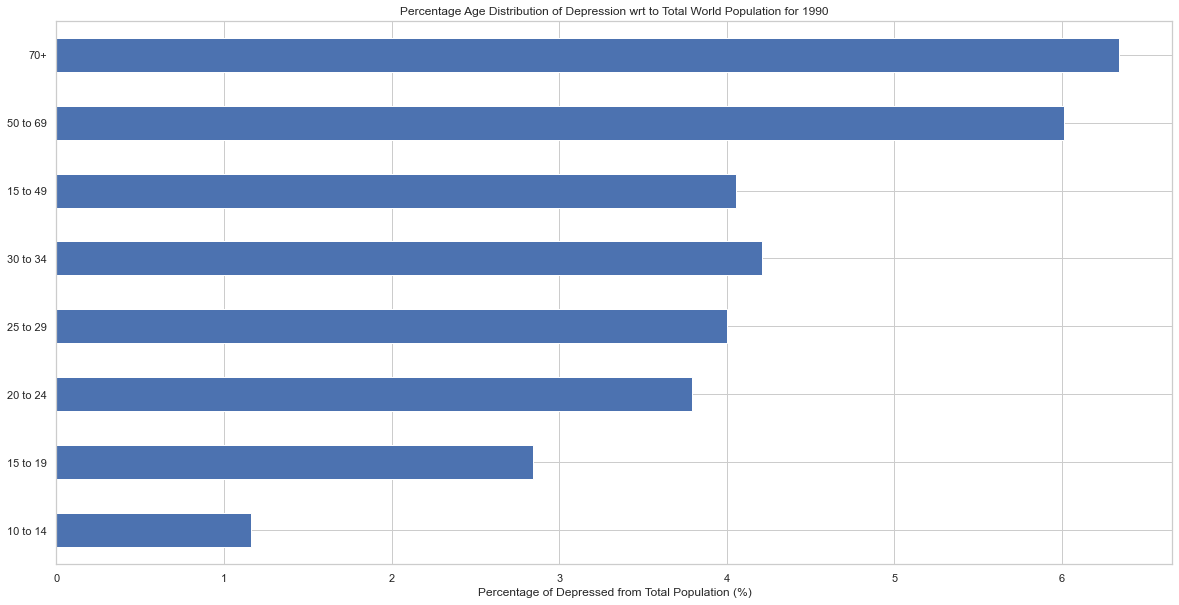

In [57]:
fig, bx = plt.subplots(figsize=(20, 10))

def plot_depression_age_distribution(data, col, dx):
    data.plot(kind='barh')

    labels = data.index
    y_pos = np.arange(len(labels))

#     dx.barh(y_pos, data, align='center')
    # dx.set_yticks(y_pos)
    # dx.invert_yaxis()  # labels read top-to-bottom
    dx.set_xlabel('Percentage of Depressed from Total Population (%)')
    dx.set_title(f'Percentage Age Distribution of Depression wrt to Total World Population for {col}')

#     plt.show()

plot_depression_age_distribution(world_depression_by_age.T[1990], 1990, bx)

In [ ]:
def plot_depression_distribution_by_age(data):
    group = group[group.index != 'World'].sort_values("Total_Depressed", ascending=False)[:10]
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    labels = list(group.index)

    # Plot the total depressed population for each country
    sns.set_color_codes("pastel")
    sns.barplot(x="Total_Depressed", y=labels, data=group,
                label="Female Depressed", color="b")

    # Plot the number of male depression over the total depression
    # so that the remaining givens the number of female depression
    sns.set_color_codes("muted")
    sns.barplot(x="Male Prevalence", y=labels, data=group,
                label="Male Depressed", color="b")

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="Countries", xlabel="Number of Depressed By Gender", title='Prevalence of Depression between Gender over 1990 - 2017')
    sns.despine(left=True, bottom=True)